# Getting the distributions of the Rods and cone cells

Im not really sure how to do this.  really have to think about how i want to show the fovea vs the cone and rod cells.

one get the size of the input image. 

how to approximate the size of the foevea?

In [1]:
from PIL import Image
import numpy as np
import colorsys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math




1. get the shape of the images
2. calculate how much is 0.5% of the total number of pixels
3. get all the factors of the number of the 0.5% pixels
4. get the middle two factors
5. find half the length and half the width of the shape file, that will be the starting pixel.
6. then find half the width and half the length of the fovea thats the length that you add on and subtract in the starting pixel
7. create a filter and find the appropriate pixels for the fovea.
8. each pixel with have a number 1, 2 3 4. each number corresponds to a type of cell. 

<h1>Distribution of numbers of each type of cell</h1>


The distribution of photoreceptor cells in the human retina varies across different regions and includes a mix of S-cones, M-cones, L-cones, and rod cells. 
Here's an overview of their distribution:

Overall numbers:

- Rods: There are approximately 92-120 million rod cells in the human retina.
- Cones: The human retina contains about 6-7 million cone cells in total.

Fovea:

- L-cones and M-cones are most concentrated in the fovea tightly packed
- S-cones are absent from the center of the human fovea.
- Rod cells are absent from the fovea.

Distribution of cone types:

- L-cones (sensitive to long wavelengths) and M-cones (sensitive to medium wavelengths) are the most numerous, with L-cones typically outnumbering M-cones.
- The ratio of L-cones to M-cones varies among individuals, with some studies showing ratios like 75.8% L-cones to 20.0% M-cones, or 50.6% L-cones to 44.2% M-cones.
- S-cones (sensitive to short wavelengths) make up only about 5-10% of the total cone population and are more peripherally located in the retina.

Peripheral retina:

- Rod cells dominate the peripheral retina, where they are more numerous than cones.
- Cones become less densely packed towards the periphery of the retina.

It's important to note that the exact distribution and ratios of photoreceptor cells can vary among individuals. The retinal mosaic, which refers to the overall distribution of rods and cones, is designed to optimize visual function in different lighting conditions and for various visual tasks.

ref plain old wikipedia:  https://en.wikipedia.org/wiki/Cone_cell


## 1 to 4


In [2]:
from image_class import ImageConverter
from pixel_class import Pixel

# Example usage
converter = ImageConverter("text_image_1.jpg")

total_pixels = converter.image.size[0] * converter.image.size[1] 
fovea_pixls = total_pixels * 0.005


def round_to_even(number):
    rounded = round(number)
    # Check if rounded number is odd
    if rounded % 2 != 0:
        # If the original number is greater than the rounded number, round up to the next even number
        if number > rounded:
            return rounded + 1
        # If the original number is less than the rounded number, round down to the previous even number
        else:
            return rounded - 1
    return rounded

fovea_pixls = round_to_even(fovea_pixls)

In [3]:
print(total_pixels)
print(fovea_pixls)

1049088
5246


In [4]:


def find_factors(n):
    factors = set()
    for i in range(1, int(math.sqrt(n)) + 1):
        if n % i == 0:
            factors.add(i)
            factors.add(n // i)
    return sorted(factors)



In [5]:
def middle_two_factors(n):
    factors = find_factors(n)
    length = len(factors)
    
    if length % 2 == 0:
        middle_index = length // 2
        return factors[middle_index - 1], factors[middle_index]
    else:
        # For numbers with an odd number of factors, return the middle one repeated
        middle_index = length // 2
        return factors[middle_index], factors[middle_index]

In [6]:
# Example usage
number = 5244
middle_factors = middle_two_factors(number)
print(middle_factors) 

(69, 76)


In [7]:
def get_fovea_size(image_path):
    converter = ImageConverter(image_path)
    total_pixels = converter.image.size[0] * converter.image.size[1] 
    fovea_pixls = total_pixels * 0.005


    fovea_pixls = round_to_even(fovea_pixls)
    dimensions_fovea = middle_two_factors(fovea_pixls)
    return dimensions_fovea


    


In [8]:
image_path = "text_image_1.jpg"

print(get_fovea_size(image_path))

(61, 86)


# 5. get the starting pixel of the fovea


In [9]:

 length= converter.image.size[0] 
 width= converter.image.size[1] 
fovea_width = middle_factors[0]
fovea_length = middle_factors[1]


In [10]:
print(width)
print(length)
print(fovea_length)
print(fovea_width)

768
1366
76
69


In [11]:
def calculate_fovea_corner(width_retina, height_retina, width_fovea, height_fovea):
    x_start = (width_retina - width_fovea) // 2
    y_start = (height_retina - height_fovea) // 2
    return x_start, y_start


fovea_corner = calculate_fovea_corner(width, length, fovea_width, fovea_length)
print(f"The fovea starts at pixel: {fovea_corner}")

The fovea starts at pixel: (349, 645)


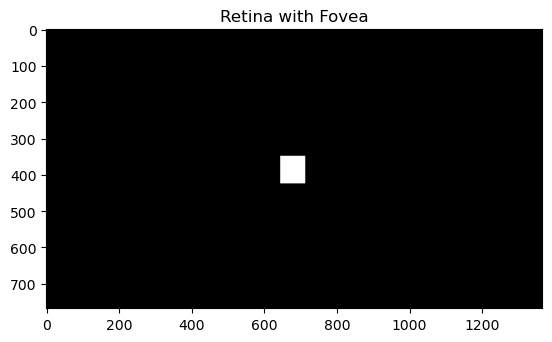

In [12]:

def create_retina_with_fovea(width, length, fovea_width, fovea_length):
    # Create a retina grid filled with zeros
    retina = np.zeros((width,length))
    
    # Calculate the starting position of the fovea
    y_start= (width - fovea_width) // 2
    x_start= (length - fovea_length) // 2
    
    # Fill the fovea area with ones
    retina[y_start:y_start + fovea_length, x_start:x_start + fovea_width] = 1
    
    return retina


# Create the retina grid with fovea
retina = create_retina_with_fovea(width,length,fovea_width , fovea_length)

# Plot the result using matplotlib
plt.imshow(retina, cmap='gray')
plt.title("Retina with Fovea")
plt.show()

### add the filters


In [13]:

def get_filtered_indices(arr, row_range=None, col_range=None):
    indices = np.array(np.unravel_index(np.arange(arr.size), arr.shape)).T
    
    # Apply combined row and column range filter
    if row_range and col_range:
        mask = ~((indices[:, 0] >= row_range[0]) & (indices[:, 0] <= row_range[1]) &
                 (indices[:, 1] >= col_range[0]) & (indices[:, 1] <= col_range[1]))
        indices = indices[mask]
    
    return indices


# Example usage:
arr = retina
first_val_range = (fovea_corner[0], fovea_corner[0] + fovea_width)   # Filter out indices where the first value is between 0 and 1
second_val_range = (fovea_corner[1], fovea_corner[1] + fovea_length)  # Filter out indices where the second value is between 1 and 2
filtered_indices = get_filtered_indices(arr, first_val_range, second_val_range)
print(filtered_indices)



[[   0    0]
 [   0    1]
 [   0    2]
 ...
 [ 767 1363]
 [ 767 1364]
 [ 767 1365]]


C:\Users\preet\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


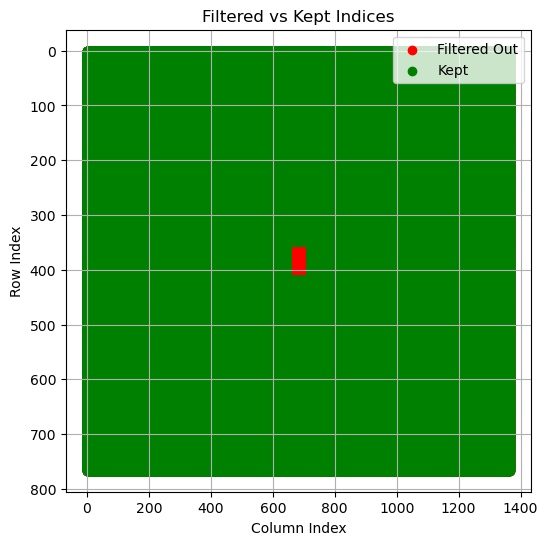

In [14]:
# test 
# Get all indices for visualization
all_indices = np.array(np.unravel_index(np.arange(arr.size), arr.shape)).T

# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(all_indices[:, 1], all_indices[:, 0], color='red', label='Filtered Out')
plt.scatter(filtered_indices[:, 1], filtered_indices[:, 0], color='green', label='Kept')
plt.gca().invert_yaxis()  # To match the typical array indexing

# Adding labels and title
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.title('Filtered vs Kept Indices')
plt.legend()
plt.grid(True)
plt.show()

## iterate through each pixel... i tried other ways but it didn't work

In [15]:

    
    # # Fill the fovea area with ones
    # retina[y_start:y_start + fovea_length, x_start:x_start + fovea_width] = 1


In [16]:
import random
from PIL import Image
import numpy as np



probabilities_retina = [0.95, 0.005, 0.015, 0.03]
probabilities_fovea = [0,0,0.75,0.25]
# 1 is rod
# 2 is S
# 3 => M
# 4 => L


def apply_dist(image_path,fovea_width,fovea_length):

    
    
    
    probabilities_retina = [0.95, 0.005, 0.015, 0.03]
    probabilities_fovea = [0,0,0.75,0.25]

    image_orig = ImageConverter(image_path)
    wavelengths_image = image_orig.image_to_wavelengths()
    brightness_image = image_orig.image_to_brightness()

    print(wavelengths_image.shape)
    
    length= image_orig.image.size[0] 
    print(length)
    width= image_orig.image.size[1] 
    print(width)
    y_start= (width - fovea_width) // 2
    print(y_start)
    x_start= (length - fovea_length) // 2
    print(x_start)
    
    filter_array = np.zeros((width,length))
    output_array = np.zeros((width,length))
    
    cell_type = [1, 2, 3, 4]
    
    # Iterate through the 2D array
    for x in range(width):
        for y in range(length):
            the_wavelength = wavelengths_image[x][y]

            if (x_start <= y <=  x_start + fovea_length) and (y_start <= x <=  y_start + fovea_width):
                choosen_num = random.choices(cell_type, probabilities_fovea)[0]                
            else:
                choosen_num = random.choices(cell_type, probabilities_retina)[0]      
                
            filter_array[x][y] = choosen_num
            output = 0
            if choosen_num == 1:
                if 30 <= brightness_image[x][y]  <= 50:
                    output= Pixel(the_wavelength).rod
                    
            if choosen_num == 2:
                if 30 <= brightness_image[x][y]  <= 150:
                    output= Pixel(the_wavelength).s_cone
                    
            if choosen_num == 3:
                if 50 <= brightness_image[x][y]  <= 200:
                    output= Pixel(the_wavelength).m_cone
                    
            if choosen_num == 4:
                if 50 <= brightness_image[x][y]  <= 255:
                    output= Pixel(the_wavelength).l_cone
                    
            output_array[x][y]= output
    return output_array,filter_array

(768, 1366)
1366
768
349
645


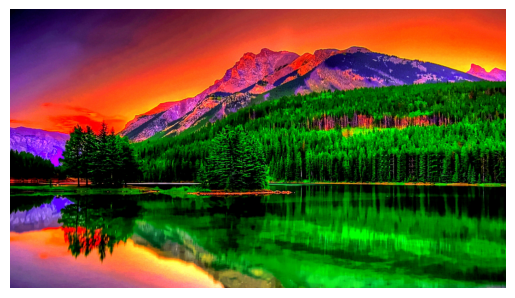

In [17]:



image_path = "text_image_1.jpg"
fovea_width = middle_factors[0]
fovea_length = middle_factors[1]


two_arrays = apply_dist(image_path,fovea_width,fovea_length)

img = mpimg.imread('text_image_1.jpg')  

# Display image
plt.imshow(img)
plt.axis('off')  
plt.show()

In [18]:
print(two_arrays[0])

output =two_arrays[0]

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.08463152 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


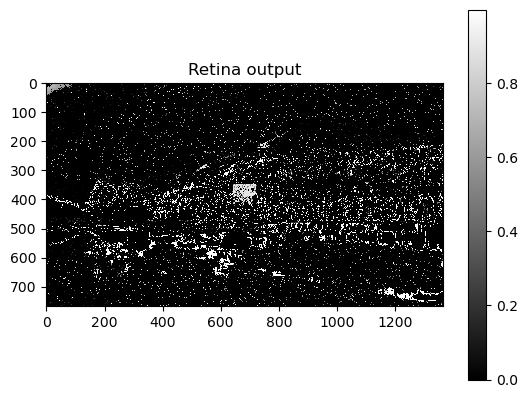

In [19]:
plt.imshow(output, cmap='gist_gray', interpolation='nearest')
plt.colorbar()
plt.title('Retina output')
plt.show()

In [20]:
cell_type =two_arrays[1]

print(cell_type)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 4. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


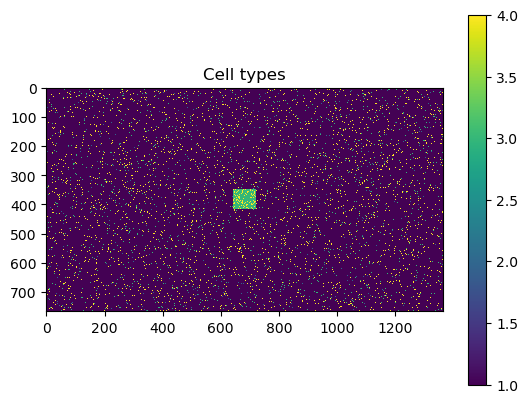

In [21]:
plt.imshow(cell_type,  interpolation='nearest')
plt.colorbar()
plt.title('Cell types')
plt.show()

In [22]:



image_path = "test_image_2.jpg"


print(get_fovea_size(image_path))

the_fovea_dim = get_fovea_size(image_path)

fovea_width = the_fovea_dim[0]
fovea_length = the_fovea_dim[1]


two_arrays = apply_dist(image_path,fovea_width,fovea_length)


(26, 97)
(580, 870)
870
580
277
386


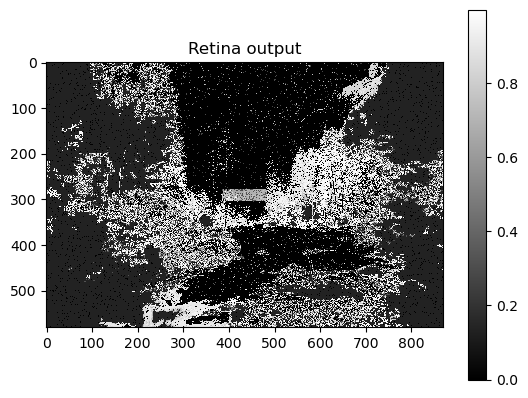

In [23]:

output = two_arrays[0]

plt.imshow(output, cmap='gist_gray', interpolation='nearest')
plt.colorbar()
plt.title('Retina output')
plt.show()

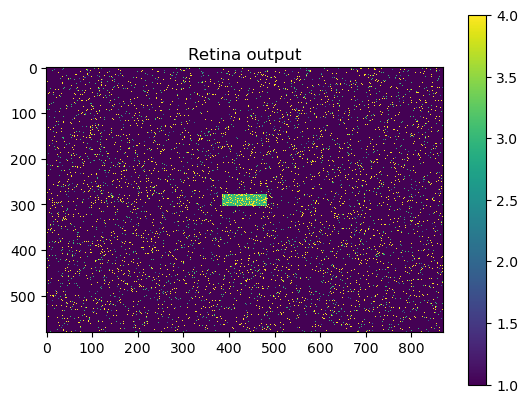

In [24]:
filter_ = two_arrays[1]

plt.imshow(filter_, interpolation='nearest')
plt.colorbar()
plt.title('Retina output')
plt.show()

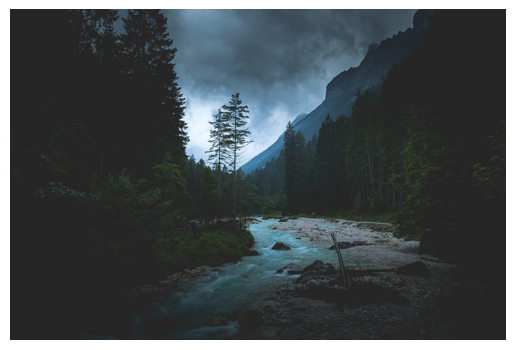

In [25]:
# the true imgae looks like this

img = mpimg.imread('test_image_2.jpg')  # Replace with your image path

# Display image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

## this is interesting


i choose a low brightness image. and you can see, there is a lot more output from the retina. which is expected

i know that the retina can detect up to single photons but im curious about digital photos. now i have to research how they work. for example with images in the dark are they comparable to what i see in the dark? The retina can detect single photons, but im not sure about a camera... maybe i can substitue a camera with something else in the future

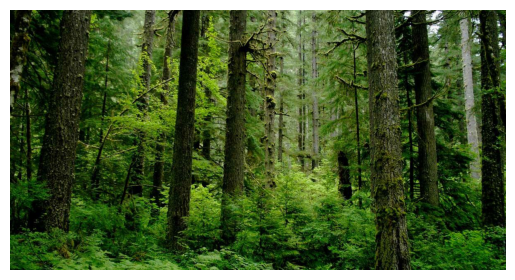

In [26]:
# the true imgae looks like this

img = mpimg.imread('test_image_3.jpg')  # Replace with your image path

# Display image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [27]:


image_path = "test_image_3.jpg"


print(get_fovea_size(image_path))

the_fovea_dim = get_fovea_size(image_path)

fovea_width = the_fovea_dim[0]
fovea_length = the_fovea_dim[1]


two_arrays = apply_dist(image_path,fovea_width,fovea_length)


(60, 63)
(630, 1200)
1200
630
285
568


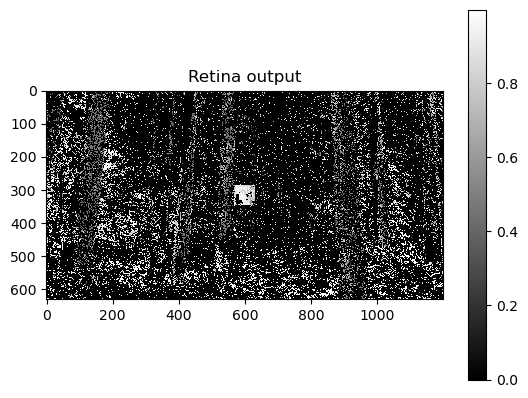

In [31]:

output = two_arrays[0]

plt.imshow(output, cmap='gist_gray', interpolation='nearest')
plt.colorbar()
plt.title('Retina output')

plt.savefig('test_3.jpeg', format='jpeg')
plt.show()

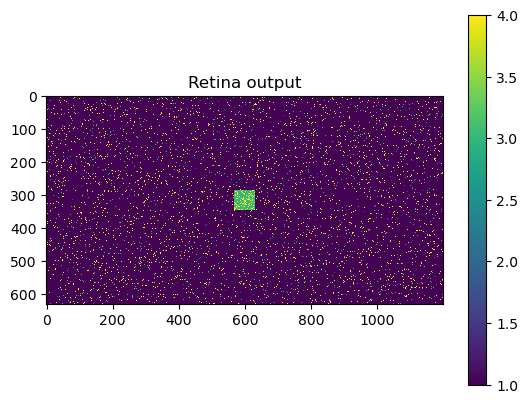

In [29]:
filter_ = two_arrays[1]

plt.imshow(filter_, interpolation='nearest')
plt.colorbar()
plt.title('Retina output')
plt.show()

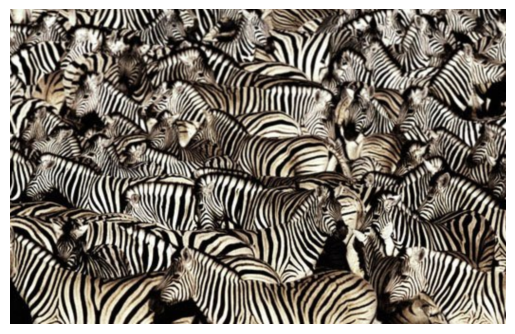

In [32]:
# the true imgae looks like this

img = mpimg.imread('test_image_4.jpg')  # Replace with your image path

# Display image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [33]:


image_path = "test_image_4.jpg"


print(get_fovea_size(image_path))

the_fovea_dim = get_fovea_size(image_path)

fovea_width = the_fovea_dim[0]
fovea_length = the_fovea_dim[1]


two_arrays = apply_dist(image_path,fovea_width,fovea_length)


(56, 62)
(664, 1046)
1046
664
304
492


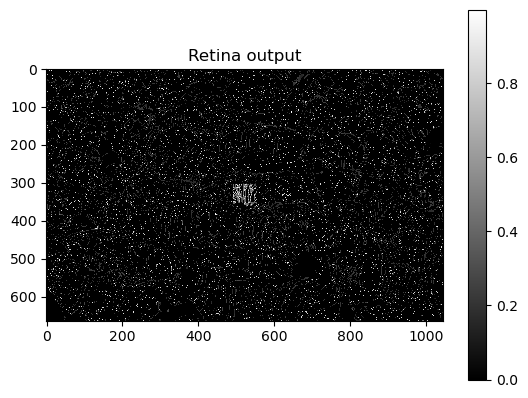

In [34]:

output = two_arrays[0]

plt.imshow(output, cmap='gist_gray', interpolation='nearest')
plt.colorbar()
plt.title('Retina output')

plt.savefig('test_4.jpeg', format='jpeg')
plt.show()

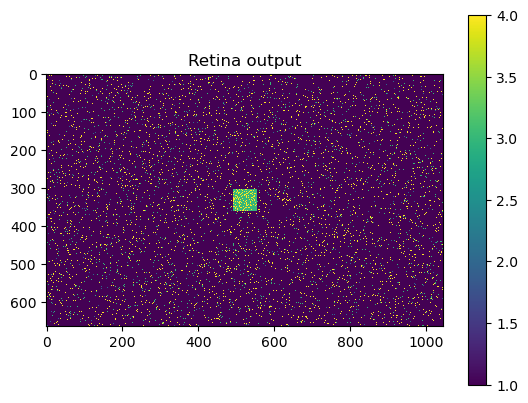

In [35]:
filter_ = two_arrays[1]

plt.imshow(filter_, interpolation='nearest')
plt.colorbar()
plt.title('Retina output')
plt.show()

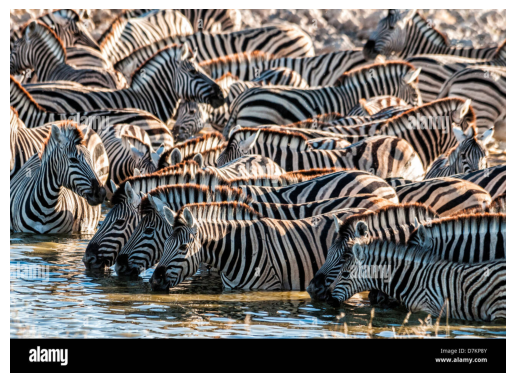

In [36]:
# the true imgae looks like this

img = mpimg.imread('test_image_5.jpg')  # Replace with your image path

# Display image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [40]:


image_path = "test_image_5.jpg"


print(get_fovea_size(image_path))

the_fovea_dim = get_fovea_size(image_path)

fovea_width = the_fovea_dim[0]
fovea_length = the_fovea_dim[1]


two_arrays = apply_dist(image_path,fovea_width,fovea_length)


(38, 163)
(953, 1300)
1300
953
457
568


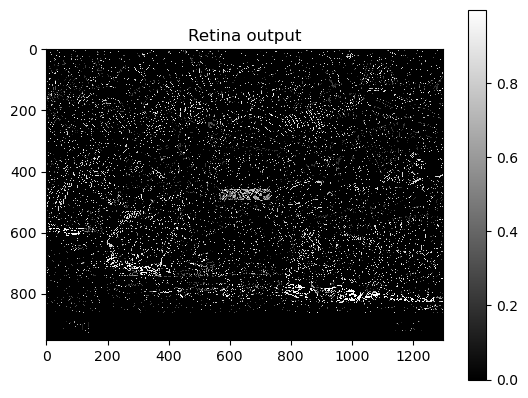

In [41]:
output = two_arrays[0]

plt.imshow(output, cmap='gist_gray', interpolation='nearest')
plt.colorbar()
plt.title('Retina output')

plt.savefig('test_5.jpeg', format='jpeg')
plt.show()

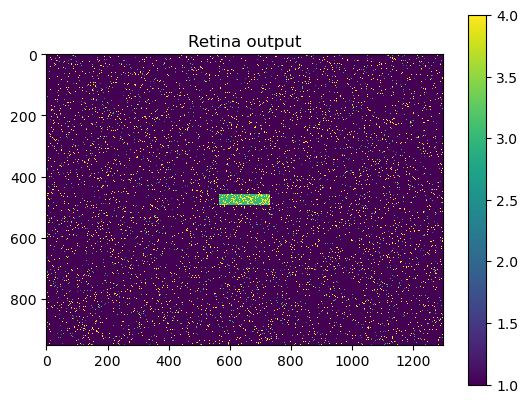

In [42]:
filter_ = two_arrays[1]

plt.imshow(filter_, interpolation='nearest')
plt.colorbar()
plt.title('Retina output')
plt.show()

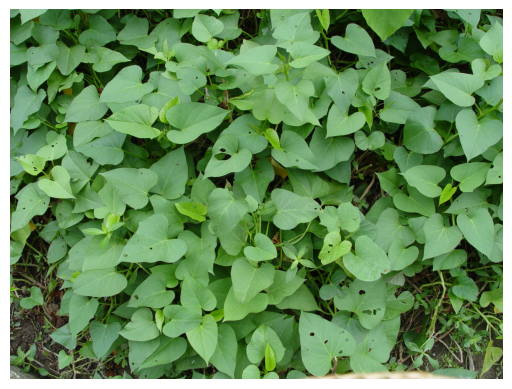

In [44]:
# the true imgae looks like this

img = mpimg.imread('test_image_6.jpg')  # Replace with your image path

# Display image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [45]:


image_path = "test_image_6.jpg"


print(get_fovea_size(image_path))

the_fovea_dim = get_fovea_size(image_path)

fovea_width = the_fovea_dim[0]
fovea_length = the_fovea_dim[1]


two_arrays = apply_dist(image_path,fovea_width,fovea_length)


(16, 983)
(1536, 2048)
2048
1536
760
532


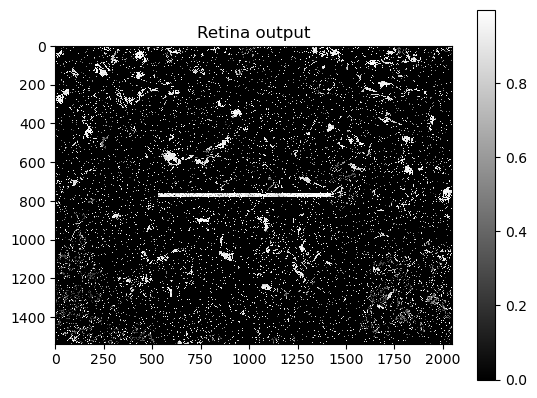

In [46]:
output = two_arrays[0]

plt.imshow(output, cmap='gist_gray', interpolation='nearest')
plt.colorbar()
plt.title('Retina output')

plt.savefig('test_6.jpeg', format='jpeg')
plt.show()

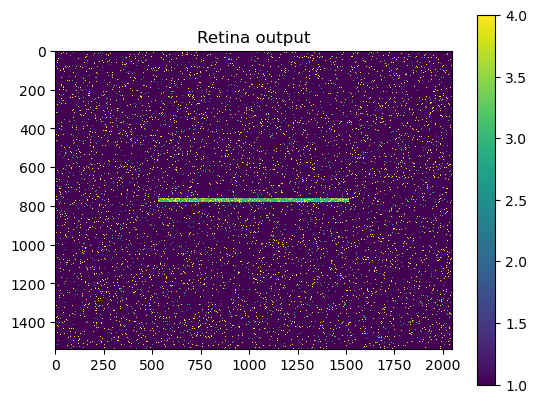

In [47]:
filter_ = two_arrays[1]

plt.imshow(filter_, interpolation='nearest')
plt.colorbar()
plt.title('Retina output')
plt.show()